# 数据覆盖全 10dB以上有拐点

2023-05-24 23:39:02.816633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|       -20.0|  9.115e-01|  4.651e-01|          121934|     8.793e-01|     4.264e-01|             111789|   8.816e-01|   4.407e-01|           115514|      1.767e+03|
|--------------------------------------------------------------------------------------------------------------------------------------------

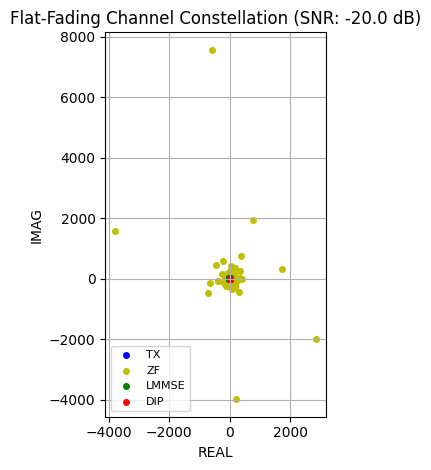

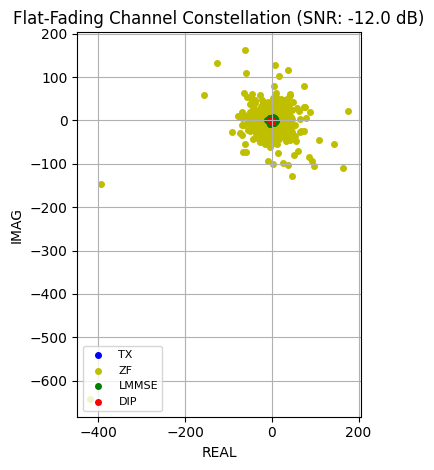

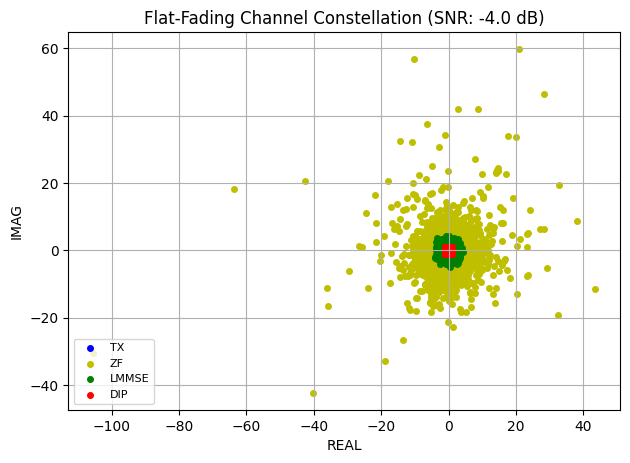

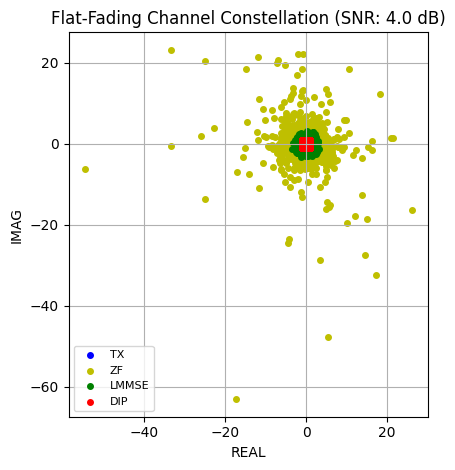

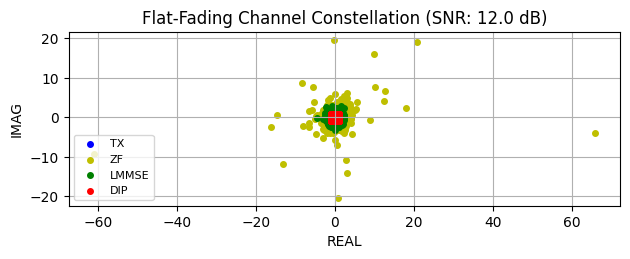

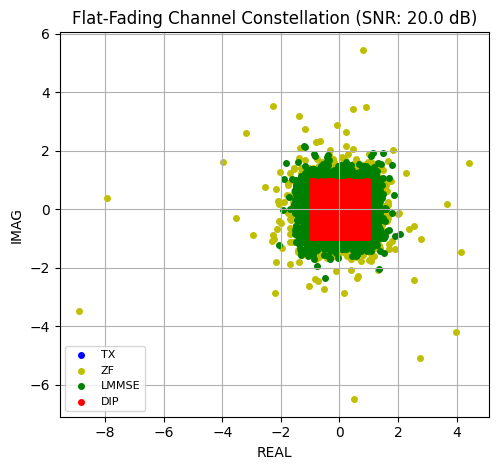

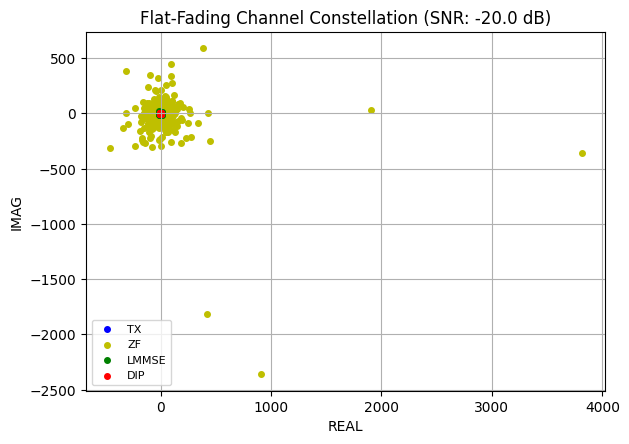

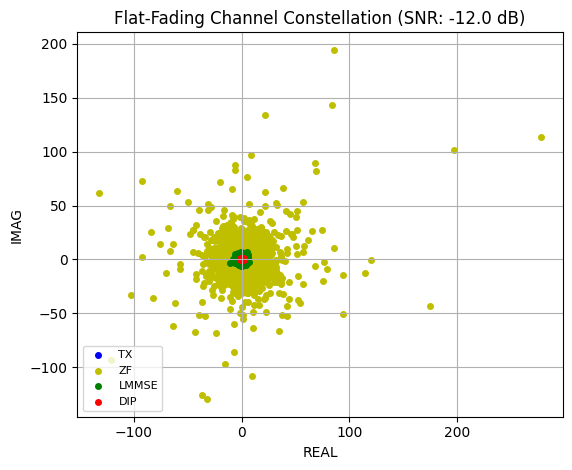

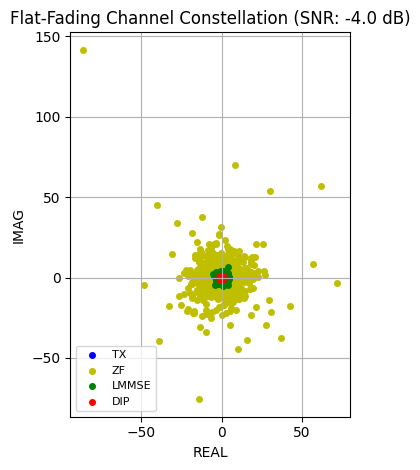

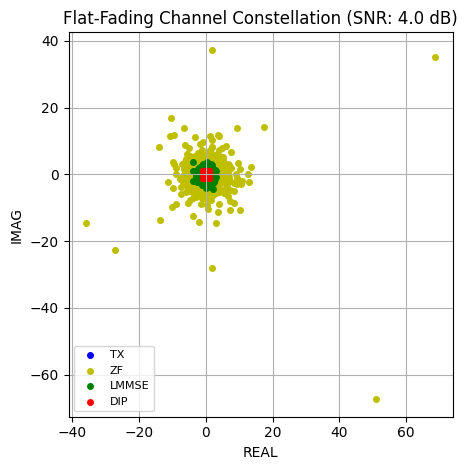

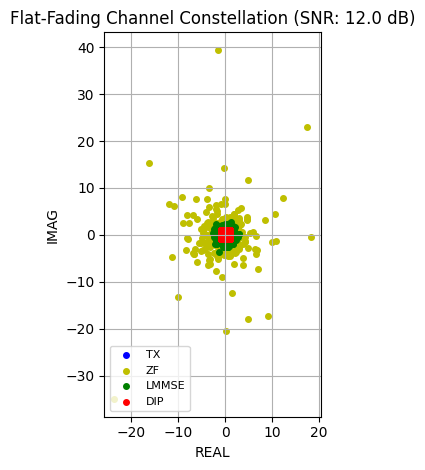

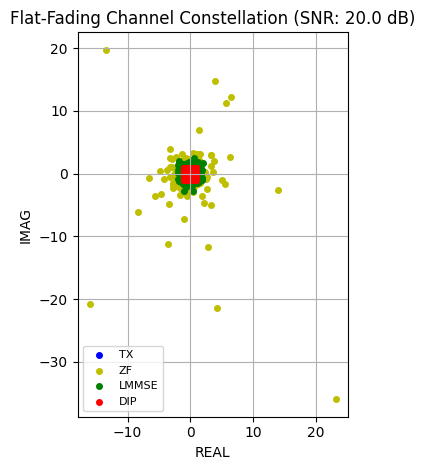

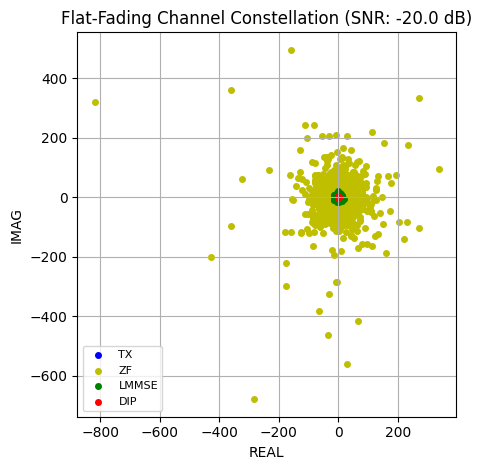

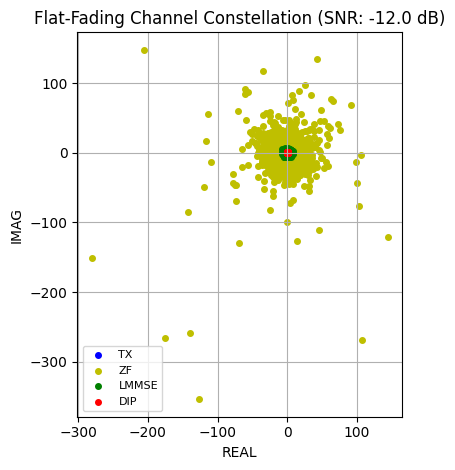

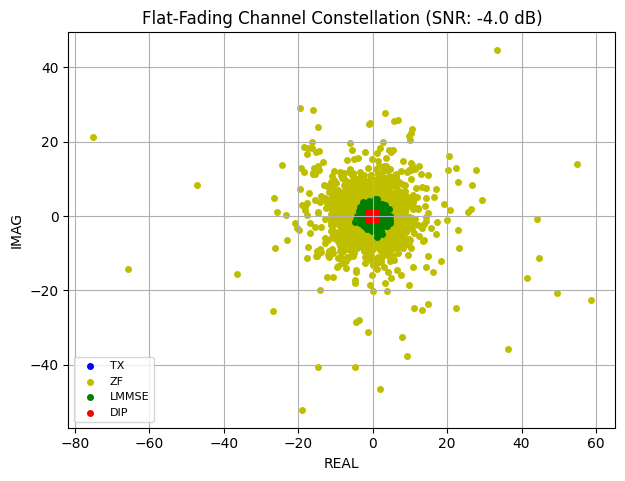

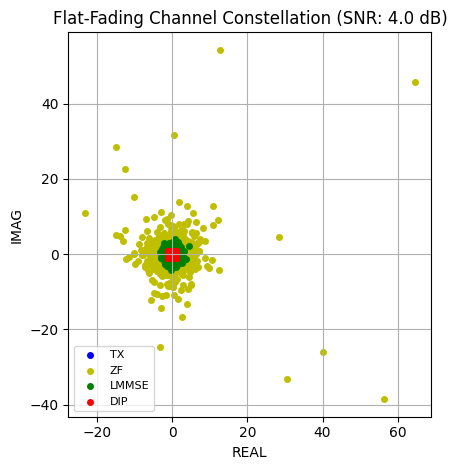

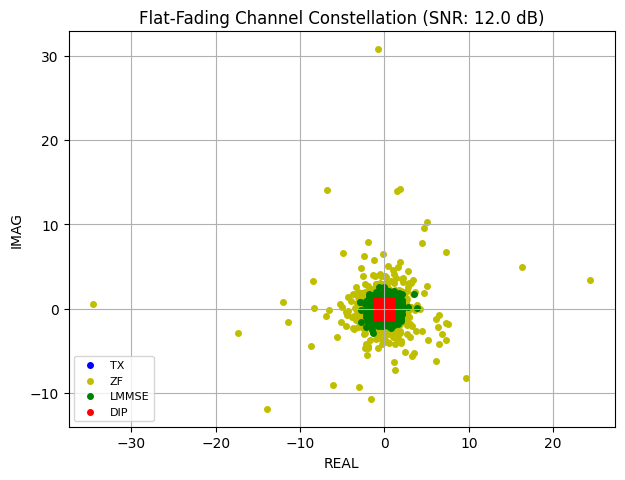

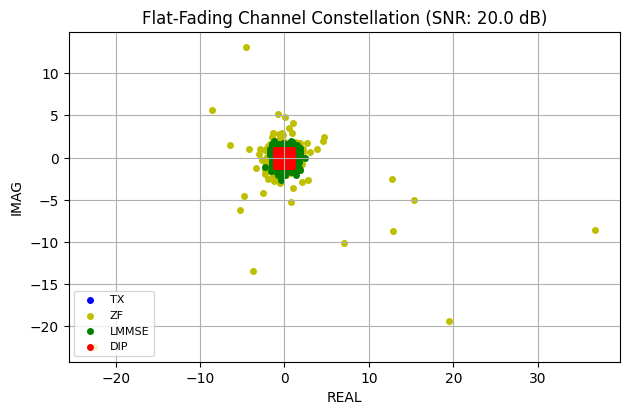

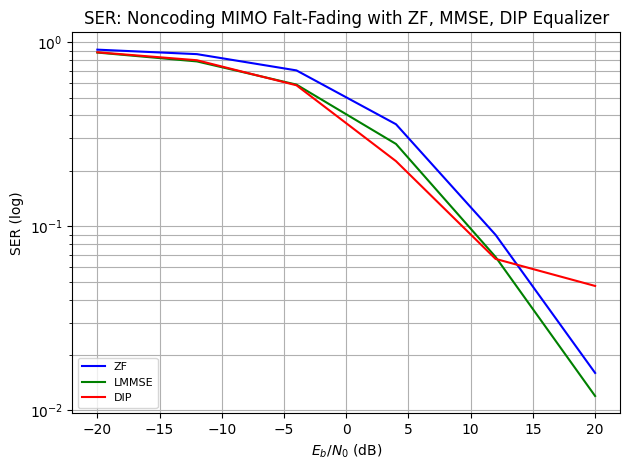

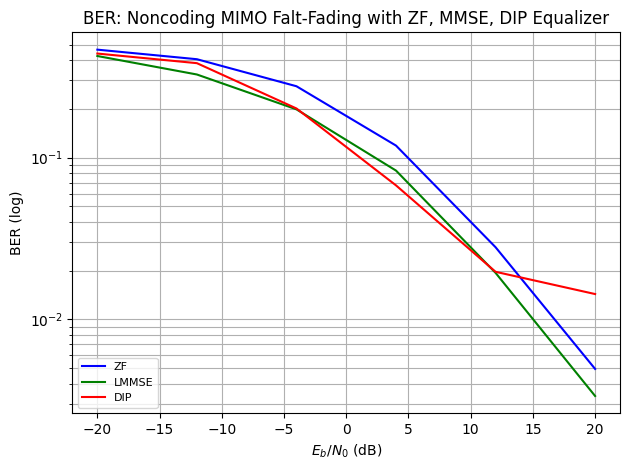

Loading BokehJS ...

Loading BokehJS ...

(array([-20., -12.,  -4.,   4.,  12.,  20.]),
 array([0.91130575, 0.86157735, 0.70298767, 0.35853068, 0.08995056,
        0.01599121]),
 array([0.87874349, 0.78663635, 0.58864339, 0.28020732, 0.06822713,
        0.01198324]),
 array([0.88183085, 0.79826355, 0.5836436 , 0.22594198, 0.06656392,
        0.04745483]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from UncodedSystemFlatFading import UncodedSystemFlatFading

Block_Length = 256         # Block Length (k)
NUM_BITS_PER_SYMBOL = 4    # Mapping: 16QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 4             # Transmit Antennas
NUM_RX_ANT = 4             # Receive Antennas

NUM_DATA_GROUP = 3         # Number of Data Group
BATCH_SIZE = 256           # Number of Parallelly Processed Batches
EBN0_DB_MIN = -20.0        # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 20.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 6        # EBNO Points

model_uncoded_ff = UncodedSystemFlatFading(Block_Length, 
                                           NUM_BITS_PER_SYMBOL,
                                           CONSTELLATION_TYPE,
                                           DEMAPPING_METHOD,
                                           NUM_RX_ANT,
                                           NUM_TX_ANT)

model_uncoded_ff(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)